# **Лабораторная работа 4**
## **Вариант 1: Расход топлива**

Этот набор данных содержит данные о расходе топлива (миль на галлон) различных моделей автомобилей, а также другие характеристики, такие как объем двигателя,
мощность в лошадиных силах, вес, ускорение и год выпуска модели.
Атрибуты:
* mpg – расход топлива
* cylinders – число цилиндров
* displacement – объем двигателя
* horsepower – мощность (л.с.)
* weight – вес
* acceleration – ускорение
* model year – год модели
* origin – происхождение (1 – США, 2 – Европа, 3 – Япония)
* car name – модель

**Цель лабораторной работы:**
изучение принципов решения задачи многомерной
регрессии с использованием методов машинного обучения.

**Основные задачи:** </b>
* изучение инструментария Python для реализации алгоритмов многомерной
регрессии;
* освоение метода линейной регрессии;
* изучение методов оценки корректности модели многомерной линейной
регрессии;

## 1. Импортируем библиотеки и загружаем данные

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/drive/MyDrive/ОмГТУ/3 курс/5 семак/Машинное обучение/4 лр/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 2. Получим информацию о датасете

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## 3. Проверяем количество пропущенных значений и выбросов

In [8]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


## 4. Исключаем невлияющие категориальные признаки

In [9]:
cat_feat = ['car name']
df.drop(cat_feat, axis = 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## 5. Разделяем данные на признаки и целевую переменную

In [10]:
y = df['mpg']
X=df.drop('mpg', axis=1)
#убедимся, что данные в нужном формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [11]:
#посмотрим на признаки
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


## 6. Разделяем данные на обучающую и тестовую выборку
75% данных для обучения, 25% - для тестирования.


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

## 7. Применяем операцию нормализации устойчивости

In [13]:
#импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler
# и создания модели линейной регрессии
from sklearn.linear_model import LinearRegression

#создадим объект класса StandartScaler
scaler=StandardScaler()
scaler

StandardScaler()

## 8. Масштабируем признаки обучающей выборки

In [14]:
X_train_scaled=scaler.fit_transform(X_train)
#убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([5.46644295e+00, 1.92669463e+02, 1.04095545e+02, 2.97207383e+03,
        1.55953020e+01, 7.61208054e+01, 1.58724832e+00]),
 array([1.71076774e+00, 1.02113812e+02, 3.66251367e+01, 8.43043051e+02,
        2.63471496e+00, 3.62673287e+00, 8.07331223e-01]))

## 9. Обучаем модель линейной регрессии

In [15]:
model = LinearRegression().fit(X_train_scaled,y_train)
model

LinearRegression()

## 10. Делаем прогноз на основе данных тестирования

In [16]:
#преобразуем тестовые данные с использованием среднего и СКО, рассчитанных на обучающей выборке
#так тестовые данныее не повлияют на обучение модели, и мы избежим утечки данных
X_train_scaled = scaler.transform(X_test)

#сделаем прогноз на стандартизированных тестовыз данных
y_pred = model.predict(X_train_scaled)
#выведем первые пять значений с помощью диапазона индексов
y_pred[:5]

array([12.92408741, 23.96387002, 11.69148966, 21.09273075, 17.37957996])

In [17]:
#импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

#сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.413056746631898


In [18]:
#посмотрим еще одну метрику - коэфициент детерминации R2
from sklearn.metrics import r2_score
print('R2: ', np.round(r2_score(y_test, y_pred), 2))

R2:  0.81


In [19]:
#оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_train_scaled, y_test)

0.8135250272117049

## 11. Итоговое уравнение

In [20]:
#Коэффициенты
print('Coefficienrs: ', model.coef_)

Coefficienrs:  [-0.53259936  2.14864981 -0.76388361 -5.48478493  0.52763448  2.68649185
  1.31103269]


In [21]:
#Свободный член
print('Intercept: ', model.intercept_)

Intercept:  23.45402684563758


## 12. Оценим влияние признаков на целевую переменную

In [22]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477
weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000


## 13. Визуализация результатов регресии

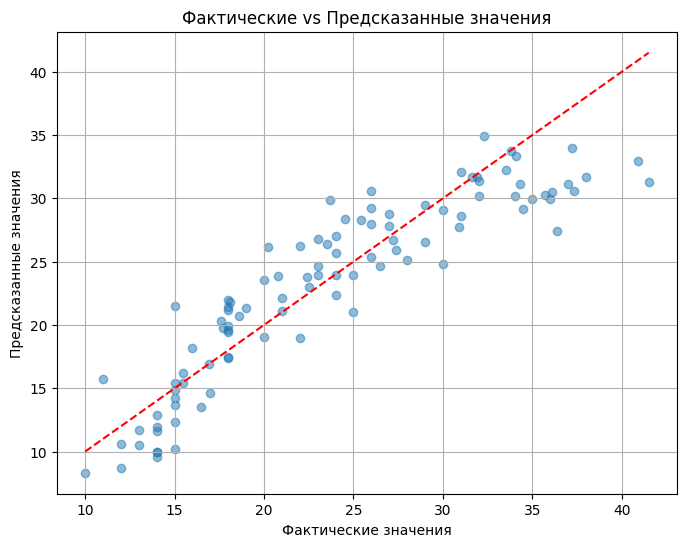

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

## 14. Остатки регрессии (Residuals Plot)
Остаток - это разница между фактическим и предсказанным значением (y_true - y_pred).
Этот график помогает проверить важное предположение линейной регресии: что остатки случайны и не имеют паттернов.

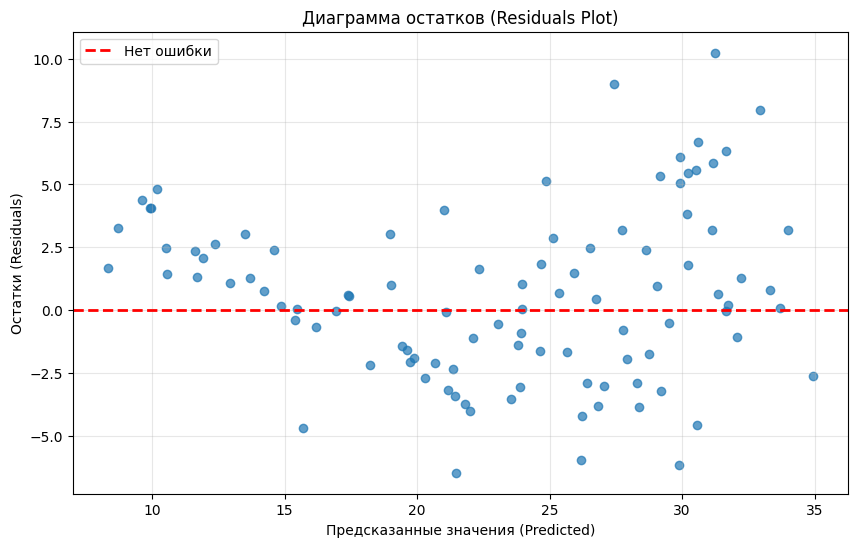

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0,color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Результат:
* Хорошо: Остатки беспорядочно разбросаны вокруг горизонтальной красной линии (нуля), нет никаких явных дуг, форм или конусов.